## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score

## Extracting data

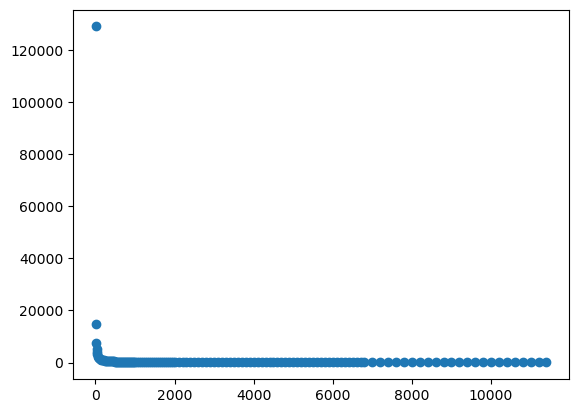

In [2]:
df=pd.read_csv("superheated_vapor_properties.csv")
df=df.loc[(df['Property']=='V')]
plt.scatter(df['Pressure'].values,df['Vap_Sat'].values )
plt.show()

## Functions for Scratch Implementation

In [3]:
def loss(y_hat, y):
    l = abs((y_hat - y) ** 2 / 2)
    return l.mean()

def forward_pass(x,m,c):
    return m*x+c

def gradient_descent(x,y,m,c,learning_rate,N):
   y_hat=forward_pass(x,m,c)
   dm = (2.0/N) * -np.sum(np.multiply(x,(y - y_hat)))
   dc = (2.0/N) * -np.sum((y - y_hat))
   m = m -learning_rate * dm
   c = c - learning_rate * dc
   return m,c

## For Pressure<300kPa

**Data**

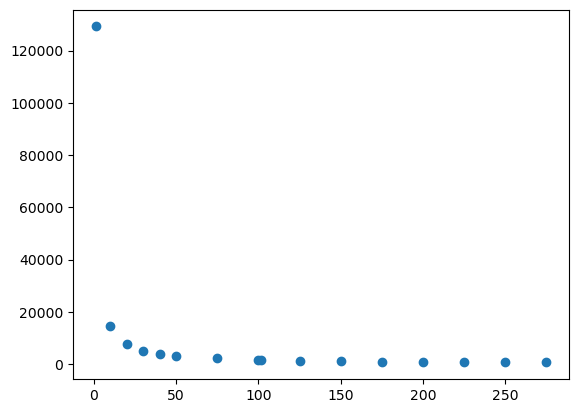

In [4]:
df1 = df.loc[(df['Pressure'] < 300)]
x1 = df1['Pressure'].values
y1 = df1['Vap_Sat'].values
plt.scatter(x1,y1)
plt.show()

**Sklearn implementation**

In [6]:
model1 = LinearRegression()
model1.fit(x1.reshape(x1.shape[0],1),y1.reshape(y1.shape[0],1))
print("Slope of the model is: ", model1.coef_[0])
print("Intercept of the model is: ", model1.intercept_)
print("r2 score of the model is: ", r2_score(y1,model1.coef_[0]*x1+model1.intercept_))

Slope of the model is:  [-145.33343846]
Intercept of the model is:  [27608.03471493]
r2 score of the model is:  0.16815590648253187


**Scratch implementation**

In [7]:
m1 = np.random.randn(1)
c1 = np.random.randn(1)
learning_rate = 0.00001
num_epochs = 300000
for i in range(num_epochs):
    m1,c1 = gradient_descent(x1,y1,m1,c1,learning_rate,x1.shape[0])
print("Slope of the model is: ", m1)
print("Intercept of the model is: ", c1)
print("r2 score of the model is: ", r2_score(y1,m1*x1+c1))

Slope of the model is:  [-128.21297656]
Intercept of the model is:  [24526.64755894]
r2 score of the model is:  0.16447852029578724


**Comparison between both implementations**

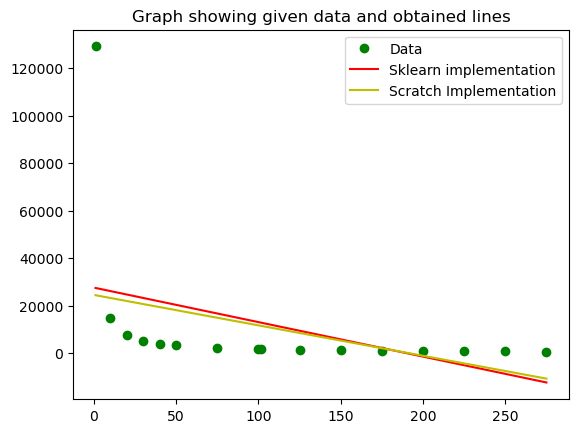

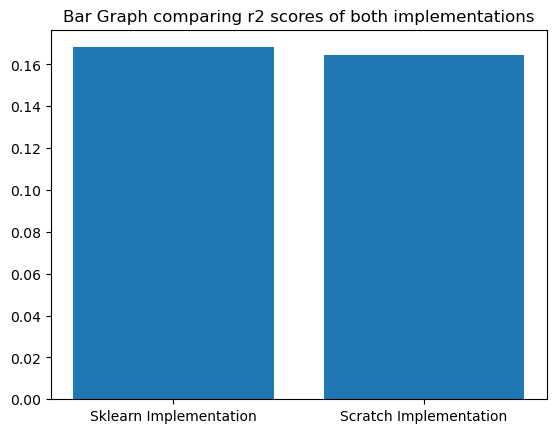

Also note that the time taken for sklearn implementation was much less than scratch implementation.


In [8]:
plt.plot(x1,y1,'go')
plt.plot(x1,model1.coef_[0]*x1+model1.intercept_,'r-')
plt.plot(x1,m1*x1+c1,'y-')
plt.legend(['Data','Sklearn implementation','Scratch Implementation'])
plt.title("Graph showing given data and obtained lines")
plt.show()
plt.bar(np.array(["Sklearn Implementation","Scratch Implementation"]), np.array([r2_score(y1,model1.coef_[0]*x1+model1.intercept_),r2_score(y1,m1*x1+c1) ]))
plt.title("Bar Graph comparing r2 scores of both implementations")
plt.show()
print("Also note that the time taken for sklearn implementation was much less than scratch implementation.")

# For Pressure>=300kPa and <1500kPa


**Data**

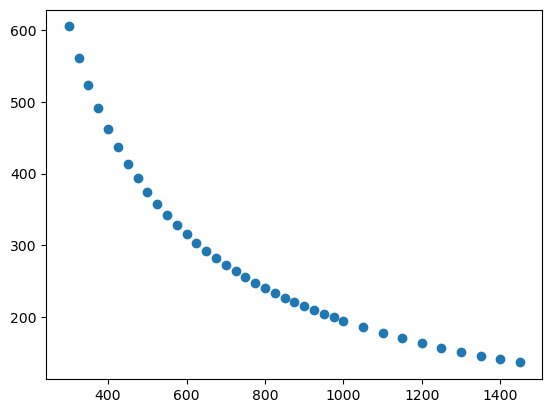

In [9]:
df2 = df.loc[(df['Pressure'] >= 300) & (df['Pressure'] < 1500)]
x2 = df2['Pressure'].values
y2 = df2['Vap_Sat'].values
plt.scatter(x2,y2)
plt.show()
x2 = x2.reshape(x2.shape[0],1)
y2 = y2.reshape(y2.shape[0],1)
x2_train, x2_test, y2_train, y2_test= train_test_split(x2,y2,test_size=0.2,random_state=2)

**Sklearn Implementation**

In [10]:
model2 = LinearRegression()
model2.fit(x2_train,y2_train)
y2_predicted = model2.predict(x2_test)
print("Slope of the model is: ", model2.coef_[0])
print("Intercept of the model is: ", model2.intercept_)
print("r2 score of the model is: ", r2_score(y2_test, y2_predicted))

Slope of the model is:  [-0.33790614]
Intercept of the model is:  [554.81485668]
r2 score of the model is:  0.7905619304260574


**Scratch Implementation**

In [11]:
m2 = 0
c2 = 300
learning_rate = 0.000001
num_epochs = 2000000
for i in range(num_epochs):
    m2,c2 = gradient_descent(x2_train.reshape(-1),y2_train.reshape(-1),m2,c2,learning_rate,x2_train.shape[0])
print("Slope of the model is: ", m2)
print("Intercept of the model is: ", c2)
print("r2 score of the model is: ", r2_score(y2_test,m2*x2_test+c2))

Slope of the model is:  -0.1848404716210462
Intercept of the model is:  411.1433207201005
r2 score of the model is:  0.5174191840234251


**Comparison between both implementations**

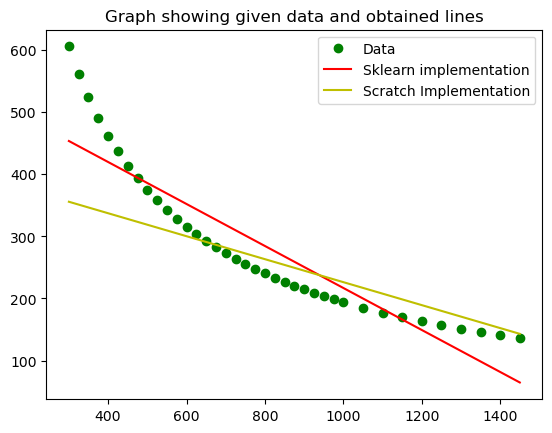

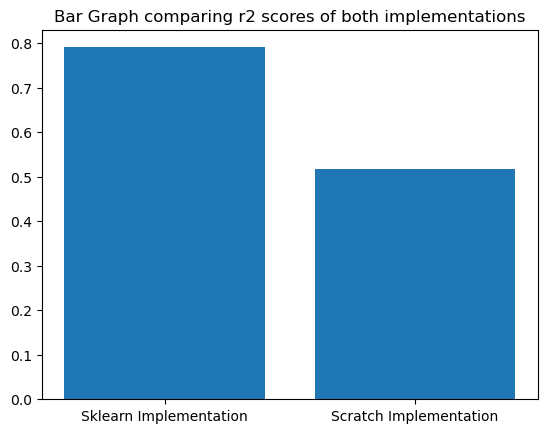

In [12]:
plt.plot(x2,y2,'go')
plt.plot(x2,model2.coef_[0]*x2+model2.intercept_,'r-')
plt.plot(x2,m2*x2+c2,'y-')
plt.legend(['Data','Sklearn implementation','Scratch Implementation'])
plt.title("Graph showing given data and obtained lines")
plt.show()
plt.bar(np.array(["Sklearn Implementation","Scratch Implementation"]), np.array([r2_score(y2_test, y2_predicted),r2_score(y2_test,m2*x2_test+c2) ]))
plt.title("Bar Graph comparing r2 scores of both implementations")
plt.show()

# For Pressure>=1500kPa


**Data**

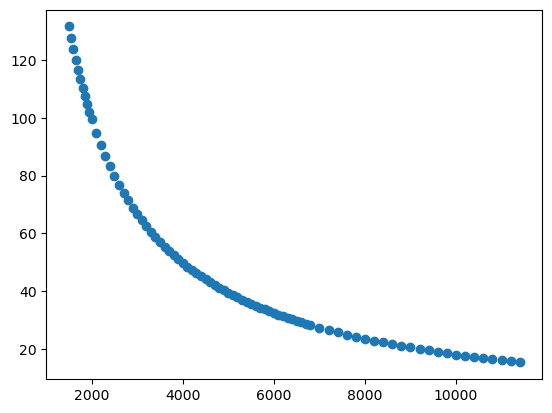

In [13]:
df3 = df.loc[(df['Pressure'] >= 1500)]
x3 = df3['Pressure'].values
y3 = df3['Vap_Sat'].values
plt.scatter(x3,y3)
plt.show()

**Sklearn implementation**

In [14]:
model3 = LinearRegression()
model3.fit(x3.reshape(x3.shape[0],1),y3.reshape(y3.shape[0],1))
print("Slope of the model is: ", model3.coef_[0])
print("Intercept of the model is: ", model3.intercept_)
print("r2 score of the model is: ", r2_score(y3,model3.coef_[0]*x3+model3.intercept_))

Slope of the model is:  [-0.00983263]
Intercept of the model is:  [103.50437059]
r2 score of the model is:  0.7640960509847484


**Scratch Implementation**

In [15]:
m3 = 0
c3 = 80
learning_rate = 0.00000002
num_epochs = 3000000
for i in range(num_epochs):
    m3,c3 = gradient_descent(x3,y3,m3,c3,learning_rate,x3.shape[0])
print("Slope of the model is: ", m3)
print("Intercept of the model is: ", c3)
print("r2 score of the model is: ", r2_score(y3,m3*x3+c3))

Slope of the model is:  -0.006509314692809743
Intercept of the model is:  80.59516736947127
r2 score of the model is:  0.6530811637085214


**Comparison between both implementations**

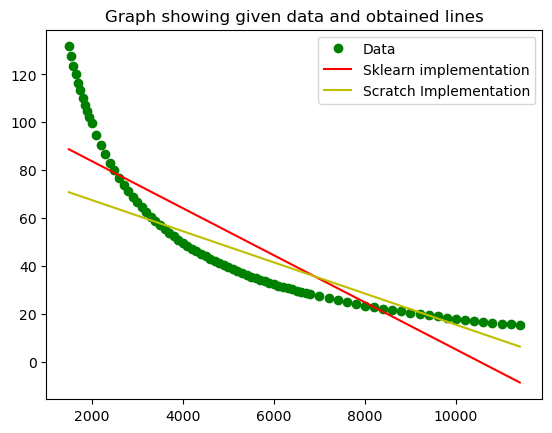

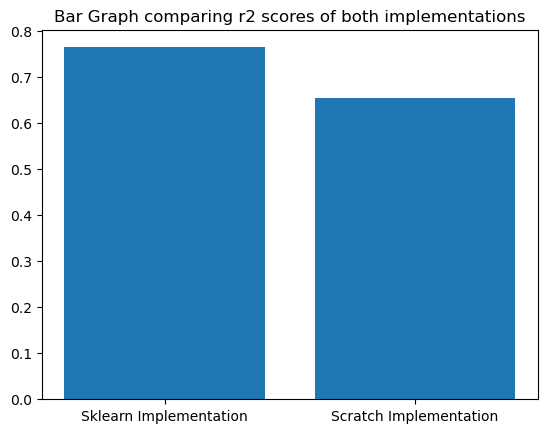

In [16]:
plt.plot(x3,y3,'go')
plt.plot(x3,model3.coef_[0]*x3+model3.intercept_,'r-')
plt.plot(x3,m3*x3+c3,'y-')
plt.legend(['Data','Sklearn implementation','Scratch Implementation'])
plt.title("Graph showing given data and obtained lines")
plt.show()
plt.bar(np.array(["Sklearn Implementation","Scratch Implementation"]), np.array([r2_score(y3,model3.coef_[0]*x3+model3.intercept_),r2_score(y3,m3*x3+c3) ]))
plt.title("Bar Graph comparing r2 scores of both implementations")
plt.show()